<a href="https://colab.research.google.com/github/rranjithkumar100/AI-Training/blob/main/Day_39_Clustering_Distance_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
d = files.upload()

Saving wine-clustering.csv to wine-clustering.csv


In [3]:
df = pd.read_csv('wine-clustering.csv')

In [4]:
df.shape

(178, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [16]:
x = df

In [22]:
X = df

In [17]:
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=3,n_init='auto', random_state=42)
kmeans.fit(x)
y_pred = kmeans.predict(x)
centroids = kmeans.cluster_centers_

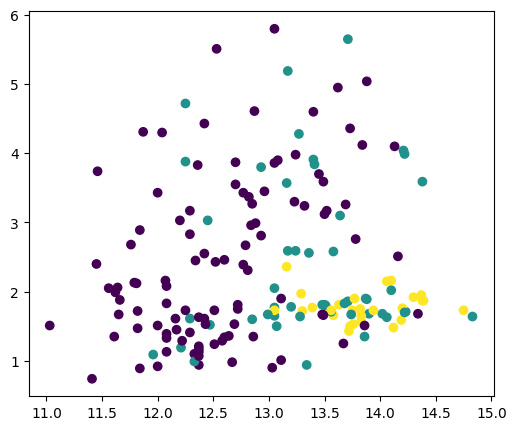

In [19]:
plt.figure(figsize=(6,5))
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y_pred)
plt.show()

In [20]:
#find the score of kmeans algorithm

from sklearn.metrics import silhouette_score
score = silhouette_score(x,y_pred)
print(score)

0.5595823478987215


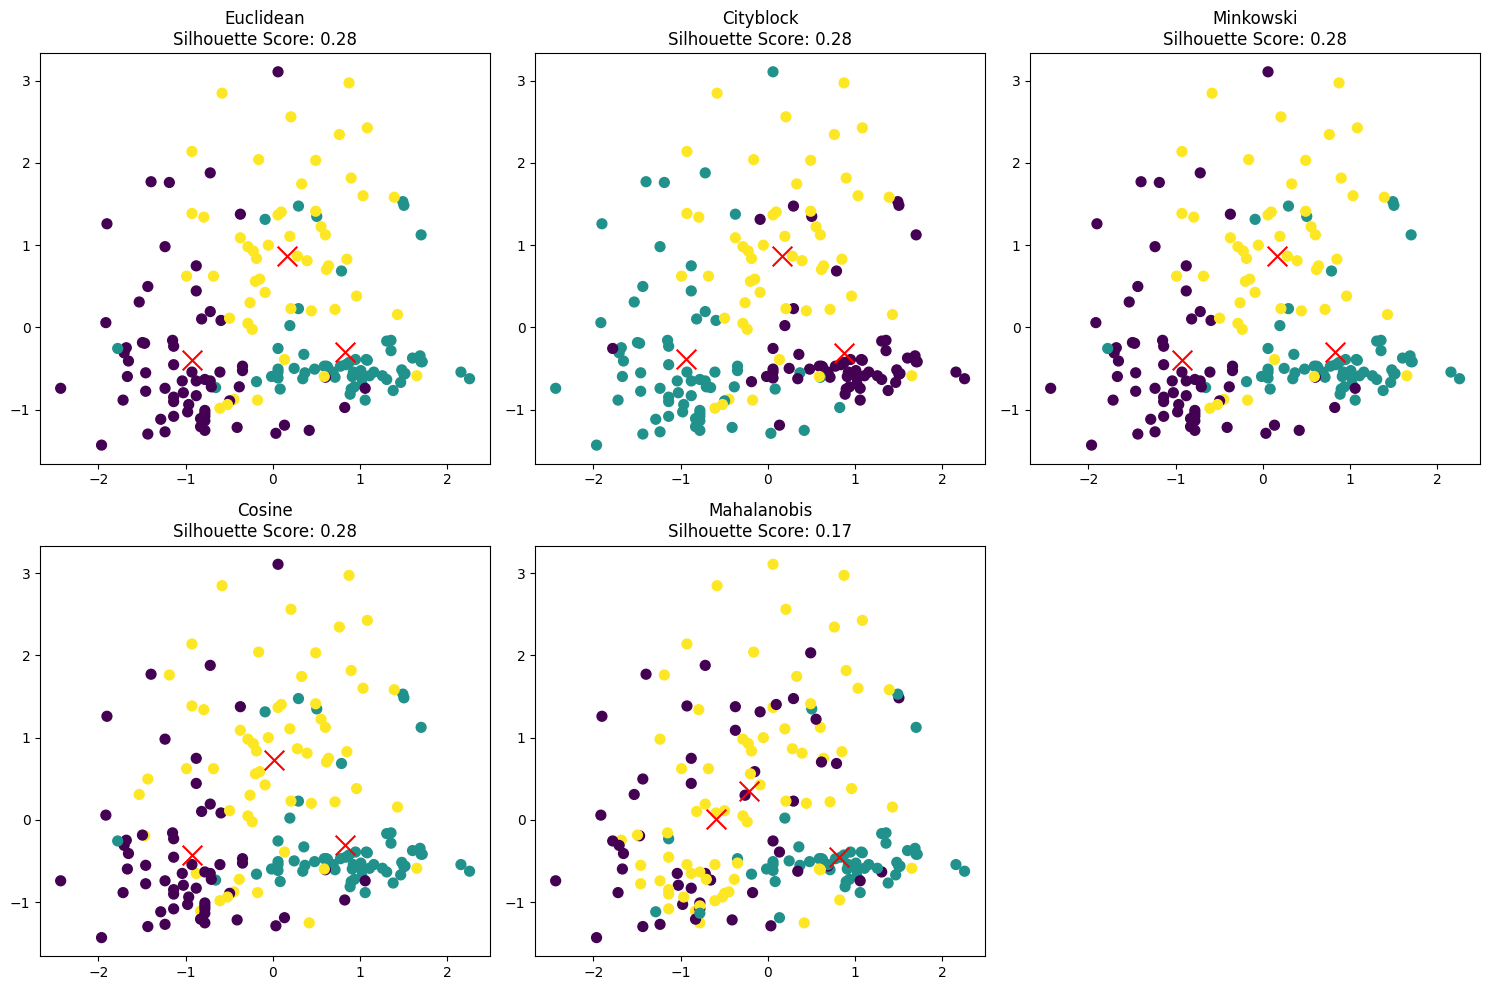

Euclidean Silhouette Score: 0.2849
Cityblock Silhouette Score: 0.2769
Minkowski Silhouette Score: 0.2849
Cosine Silhouette Score: 0.2782
Mahalanobis Silhouette Score: 0.1678


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler



# Convert X to a NumPy array
X_array = X.values  # or X.to_numpy()

# Standardize the data
X_array = StandardScaler().fit_transform(X_array)

# Custom KMeans implementation
def custom_kmeans(X, n_clusters, distance_metric, max_iter=100, random_state=42):
    np.random.seed(random_state)
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iter):
        # Assign clusters based on the distance metric
        if distance_metric == 'mahalanobis':
            cov = np.cov(X.T)
            inv_cov = np.linalg.inv(cov)
            distances = cdist(X, centroids, metric='mahalanobis', VI=inv_cov)
        else:
            distances = cdist(X, centroids, metric=distance_metric)

        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Distance metrics to compare
distance_metrics = ['euclidean', 'cityblock', 'minkowski', 'cosine', 'mahalanobis']
results = {}

# Apply KMeans with each distance metric
for metric in distance_metrics:
    labels, centroids = custom_kmeans(X_array, n_clusters=3, distance_metric=metric)
    silhouette_avg = silhouette_score(X_array, labels)
    results[metric] = {'labels': labels, 'centroids': centroids, 'silhouette_score': silhouette_avg}

# Plot the results (for 2D visualization, use the first two features)
plt.figure(figsize=(15, 10))
for i, metric in enumerate(distance_metrics):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_array[:, 0], X_array[:, 1], c=results[metric]['labels'], cmap='viridis', s=50)
    plt.scatter(results[metric]['centroids'][:, 0], results[metric]['centroids'][:, 1], c='red', marker='x', s=200)
    plt.title(f'{metric.capitalize()}\nSilhouette Score: {results[metric]["silhouette_score"]:.2f}')
plt.tight_layout()
plt.show()

# Print silhouette scores
for metric, result in results.items():
    print(f'{metric.capitalize()} Silhouette Score: {result["silhouette_score"]:.4f}')
